<a href="https://colab.research.google.com/github/BrunoAndrade1/Projetos-Concluidos/blob/master/FIFA_2018_Bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FIFA 2018 Clustering


##Objetivo do case é fazer uma clusterização dos jogadores de acordo com suas  habilidades e depois classificar de acordo com  suas habilidades,ou seja, saber onde cada jogador tem melhor desempenho.

## Possíveis melhorias no modelo usar outros algoritmos de classificação mais robusto com Dbscan entre outros.
##Para classificação usar ensembles para ter maior desempenho do modelo e outros algoritimos de classificação

\\\Source: https://www.kaggle.com/karangadiya/fifa19


\\\https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset

https://www.kaggle.com/code/ekrembayar/fifa-data-analysis-visualization

In [ ]:
# # teste do google drive
from google.colab import drive
drive.mount('/content/gdrive')

### Funções

In [ ]:
# data manipulation
import pandas as pd
import numpy as np
#from data_visualization  import *
#from funcoes_python.data_manipulation import *

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#from data_visualization import *
#from functions.data_visualization import *
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer


# clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# pipeline
from sklearn import set_config
set_config(display="diagram")

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn import tree
import pydot
import graphviz 
from ipywidgets import interactive


# metrics and model selection
from sklearn import metrics
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import (confusion_matrix, 
                             classification_report,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             auc,
                             roc_auc_score,
                             silhouette_score
                            )
                             

# set some options in pandas
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

# warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def check_duplicate_lines(data_frame):
    if data_frame.shape[0]!=data_frame.drop_duplicates().shape[0]:
        duplicate_lines = dfata_frame.shape[0]-data_frame.drop_duplicates().shape[0]
        return f'{duplicated_lines} duplicate lines'
    return '0 duplicate lines'



def check_missing(df):
    """
    Returna uma Series com o percentual de missing data em cada coluna. 
    """
    import pandas
    if isinstance(df, pandas.core.frame.DataFrame):
        missing = (((df.isnull().sum()/df.shape[0])*100).round(2)).sort_values(ascending = False)
        return missing
    return -1


def show_percentage_missing(df):
    import matplotlib.pyplot as plt
    
    "Mostra o percentual de missing em cada coluna graficamente."
    missing = check_missing(df)
    plt.figure(figsize = (10, 15))
    plt.barh(y = missing.index, width = missing.values, color = 'darkgray', height = 0.7, align = 'edge')
    plt.xlabel('% of missing values', size = 10)
    plt.ylabel('Columns', size = 10)
    plt.title('Missing Values', fontdict = {'color':'gray', 'weight':'bold', 'size': 12})
    plt.grid(alpha = 0.5)
    plt.show()
    
    
    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def feature_plot(feature, data):
    # adjusts subplots and plot size
    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    fig.suptitle(f'Univariate analysis for {feature}')
    # insert histogram in axis 0
    sns.histplot(data[feature], kde = True, ax = ax[0])
    ax[0].set_xlabel('Distribution of '+feature)
    # insert boxplot in axis 1
    sns.boxplot(y = data[feature], ax = ax[1])
    # insert violinplot in axis 2
    sns.violinplot(x = data[feature], ax = ax[2])
    # adjust spacing between subplots
    fig.tight_layout(pad = 3)


def univariate_analysis(features: list, data = pd.DataFrame):
    for feature in features:
        feature_plot(feature, data)
        

    

In [ ]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()


### Lendo e inspecionando

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Digital Hause ds_2021_tn06/Módulo 4/3. Clustering III/Material Aluno/case_FIFA/data/data.csv').drop(columns = ['Unnamed: 0'])

In [ ]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


1.   Wage = salario
2.   Jersey Number' = número da camisa excluir
3.   FKAccuracy = Falta











In [ ]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [ ]:
#df.drop(columns=['cluster'],inplace = True)

In [ ]:
# outra forma de mostrar o dtype de cada coluna e o head do df com gerenciador de contexto
# gerenciador de contexto utilizado em banco de dados 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
     display(df.head(3))
     display(df.dtypes)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                          

In [ ]:
# quantidade de linhas e a colunas
df.shape

(18207, 88)

In [ ]:
# informações genéricas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [ ]:
# quantidade de valores únicos por cada coluna
df.nunique()

ID                          18207
Name                        17194
Age                            29
Photo                       18207
Nationality                   164
Flag                          164
Overall                        48
Potential                      47
Club                          651
Club Logo                     679
Value                         217
Wage                          144
Special                      1422
Preferred Foot                  2
International Reputation        5
Weak Foot                       5
Skill Moves                     5
Work Rate                       9
Body Type                      10
Real Face                       2
Position                       27
Jersey Number                  99
Joined                       1736
Loaned From                   341
Contract Valid Until           36
Height                         21
Weight                         57
LS                             93
ST                             93
RS            

In [ ]:
# verifica o percentual de missing data
check_missing(df)

Loaned From                 93.06
LDM                         11.45
LCM                         11.45
RS                          11.45
LW                          11.45
LF                          11.45
CF                          11.45
RF                          11.45
RW                          11.45
LAM                         11.45
CAM                         11.45
RAM                         11.45
LM                          11.45
CM                          11.45
LS                          11.45
RCM                         11.45
RM                          11.45
LWB                         11.45
CDM                         11.45
RDM                         11.45
RWB                         11.45
LB                          11.45
LCB                         11.45
CB                          11.45
RCB                         11.45
RB                          11.45
ST                          11.45
Release Clause               8.59
Joined                       8.53
Contract Valid

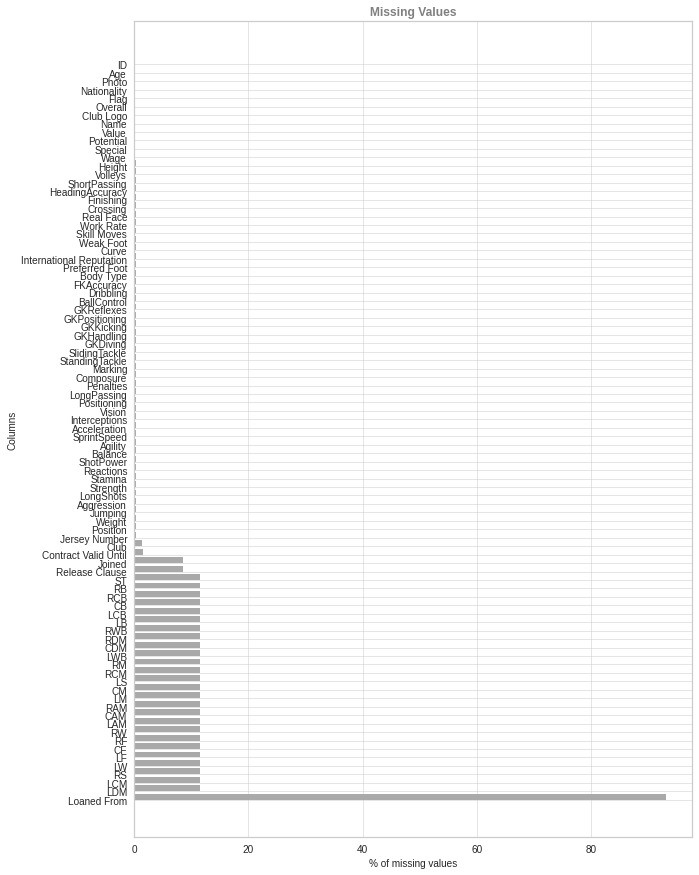

In [ ]:
# plot percentual de missing por coluna
show_percentage_missing(df)

In [ ]:
# checa linhas duplicadas
check_duplicate_lines(df)

'0 duplicate lines'

In [ ]:
# checa linhas duplicadas
check_duplicate_lines(df)

'0 duplicate lines'

## Data Cleaning

Nesta etapa iremos limpar algumas colunas do dataset, focaremos nas colunas que serão utilizadas no clustering, ou naquelas que possuem maior relevância para a compreensão dos resultados.

In [ ]:
df.Wage.head()

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

In [ ]:
df.Value.head()

0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
Name: Value, dtype: object

In [ ]:
df.Value.apply(lambda x:x[0]).value_counts()

€    18207
Name: Value, dtype: int64

In [ ]:
df.Wage.apply(lambda x:x[0]).value_counts()

€    18207
Name: Wage, dtype: int64

In [ ]:
df.Value.apply(lambda x: x[-1]).value_counts()

K    11108
M     6847
0      252
Name: Value, dtype: int64

In [ ]:
df.Wage.apply(lambda x:x[-1]).value_counts()

K    17966
0      241
Name: Wage, dtype: int64

limpar os campos: deixar padronizado os valores $

Fazendo a limpeza da coluna Value

In [ ]:
# substitui '€' por ''
df.Value = df.Value.str.replace('€', '')
# cria máscaras para remover 'M' e 'K'
M_mask = df.Value.apply(lambda x: x[-1] == 'M')
K_mask = df.Value.apply(lambda x: x[-1] == 'K')
zero_mask = df.Value.apply(lambda x: x[-1] == '0')
# remove 'M' e 'K' e transforma os valores em float
df.loc[M_mask, 'Value'] = df.loc[M_mask, 'Value'].apply(lambda x: np.float(x[:-1])*1e6)
df.loc[K_mask, 'Value'] = df.loc[K_mask, 'Value'].apply(lambda x: np.float(x[:-1])*1e3)
df.Value = df.Value.astype(float)

fazendo a limpeza da coluna Wage


In [ ]:
# dubistitui € por ''
df.Wage = df.Wage.str.replace('€','')
# cira máscara para remover '' e ' 'k'
K_mask = df.Wage.apply(lambda x:x[-1] == "K")
# pegando as linhas de K_mask = k na coluna de Wage e convertendo para 10^3 
df.loc[K_mask,'Wage'] = df.loc[K_mask,'Wage'].apply(lambda x: np.float(x[:-1])*1e3)
# convertendo para float
df.Wage = df.Wage.astype(float)


Faz processo similar para a coluna Release Clause:

In [ ]:
df['Release Clause'] = df['Release Clause'].astype(str).apply(lambda x: x[1:])
M_mask = df['Release Clause'].apply(lambda x: x[-1] == 'M')
K_mask = df['Release Clause'].apply(lambda x: x[-1] == 'K')
df.loc[K_mask, 'Release Clause'] = pd.to_numeric(df.loc[K_mask, 'Release Clause'].str.replace('K', 'e3'))
df.loc[M_mask, 'Release Clause'] = pd.to_numeric(df.loc[M_mask, 'Release Clause'].str.replace('M', 'e6'))

In [ ]:
# verifica o dtype das colunas após a transformação
df[['Wage', 'Value']].dtypes

Wage     float64
Value    float64
dtype: object

Nessa analise estou tirando posição de goleiro.
para analise de goleiro faz mais sentido fazer uma analise separada pois, as habilidade necessaria para goleiro destoa muito em relação aos outro jogadores.
no mesmo github tem analise de clusterização com goleiro para comparação
para nõa deixar poluido o data set deixei apenas a análise sem o goleiro</p>

Link github

In [ ]:
# quando for remover as linhas lembrar de colocar o .index para não dar erro
condition_2 = df.loc[df.Position == "GK"].index
df.drop(condition_2, axis = 0, inplace = True)

In [ ]:
# drop posição de goleiro
condition = df.loc[df.Value == 0].index
df.drop(condition, axis = 0, inplace = True)


In [ ]:
# set de valores incosistentes da coluna Body Type
df.loc[:2, 'Body Type'] = 'Normal'

In [ ]:
# drop de algumas colunas que não serão utilizadas na análise
cols_to_drop = ['ID', 'Photo', 'Flag', 'Club Logo']
df.drop(columns = cols_to_drop, inplace = True)

In [ ]:
# rodar depois 
# drop de algumas colunas que não serão utilizadas na análise
cols_to_drop_2 = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 
                  'Jersey Number','Real Face']
df.drop(columns = cols_to_drop_2, inplace = True)

In [ ]:
# tirando a pontução por posição pois 
# quero classificar os jogadores de acordo com suas habilidades
cols_to_drop_3 = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
                  'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
                  'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
df.drop(columns = cols_to_drop_3, inplace = True)

In [ ]:
cols_to_drop_4 = ['Name','Age','Nationality','Club','Value','Wage']
df.drop(columns = cols_to_drop_4, inplace = True)

In [ ]:
df['HeightCM'] = df['Height'].str.split("'")
# pés e polegadas
df['feet'] = df['HeightCM'].str.get(0).astype(float)
df['inch'] = df['HeightCM'].str.get(1).astype(float)

df['Height'] = (df['feet']*12+df['inch'])*2.54

https://rasulkireev.com/fifa-data-cleaning/

In [ ]:
df['Weight']

0        159lbs
1        183lbs
2        150lbs
4        154lbs
5        163lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 15966, dtype: object

In [ ]:
df['Weight'] = df.Weight.str.replace('lbs','')

In [ ]:
df.head()

,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,HeightCM,feet,inch
0,94,94,2202,Left,5.0,4.0,4.0,Medium/ Medium,Normal,RF,"Jul 1, 2004",NaN,2021,170.18,159,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,"[5, 7]",5.0,7.0
1,94,94,2228,Right,5.0,4.0,5.0,High/ Low,Normal,ST,"Jul 10, 2018",NaN,2022,187.96,183,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,"[6, 2]",6.0,2.0
2,92,93,2143,Right,5.0,5.0,5.0,High/ Medium,Normal,LW,"Aug 3, 2017",NaN,2022,175.26,150,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,"[5, 9]",5.0,9.0
4,91,92,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,"Aug 30, 2015",NaN,2023,180.34,154,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,"[5, 11]",5.0,11.0
5,91,91,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,"Jul 1, 2012",NaN,2020,172.72,163,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,"[5, 8]",5.0,8.0


In [ ]:
df = pd.get_dummies(df, columns=['Preferred Foot'])

## **Agora** criemos o subset das colunas que serão utilizadas no processo de clustering.

In [ ]:
# cria uma cópia do dataset original
data = df.copy()

In [ ]:
# # lista de colunas para serem utilziadas no clustering
# cols_to_cluster = data.columns.to_list()[49:-1]
# data = data[cols_to_cluster]

Colunas utilizadas para fazer a clusterização

In [ ]:
# verifica o percentual de missing data do subset criado para o clustering
check_missing(data)

Loaned From                 92.64
Joined                       7.66
BallControl                  0.30
Interceptions                0.30
Agility                      0.30
Reactions                    0.30
Balance                      0.30
ShotPower                    0.30
Jumping                      0.30
Stamina                      0.30
Strength                     0.30
LongShots                    0.30
Aggression                   0.30
Positioning                  0.30
Acceleration                 0.30
Vision                       0.30
Penalties                    0.30
Composure                    0.30
Marking                      0.30
StandingTackle               0.30
SlidingTackle                0.30
HeightCM                     0.30
feet                         0.30
SprintSpeed                  0.30
inch                         0.30
Height                       0.30
Preferred Foot               0.30
International Reputation     0.30
Weak Foot                    0.30
Skill Moves   

Apenas colunas utilizadas no df

In [ ]:
data = data[['Skill Moves',
       'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking',]]

In [ ]:
# cols_to_cluster = data.columns.to_list()[:]
# data = data[cols_to_cluster]

Faremos uma imputação de missing pela mediana.

Pode usar outros substitutos mais robusto e/ou excluir o missing.


In [ ]:
for col in data:
    median = data[col].median()
    data[col] = data[col].fillna(median)

In [ ]:
# missing check após a imputação
check_missing(data)

Skill Moves        0.0
Height             0.0
Composure          0.0
Penalties          0.0
Vision             0.0
Positioning        0.0
Interceptions      0.0
Aggression         0.0
LongShots          0.0
Strength           0.0
Stamina            0.0
Jumping            0.0
ShotPower          0.0
Balance            0.0
Reactions          0.0
Agility            0.0
SprintSpeed        0.0
Acceleration       0.0
BallControl        0.0
LongPassing        0.0
FKAccuracy         0.0
Curve              0.0
Dribbling          0.0
Volleys            0.0
ShortPassing       0.0
HeadingAccuracy    0.0
Finishing          0.0
Crossing           0.0
Weight             0.0
Marking            0.0
dtype: float64

In [ ]:
# estatísticas descritivas dos dados 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Skill Moves,15966.0,2.531755,0.617999,2.00,2.00,2.00,3.00,5.0
Height,15966.0,180.387249,6.420006,154.94,175.26,180.34,185.42,203.2
Crossing,15966.0,54.193912,14.109051,11.00,44.00,56.00,65.00,93.0
Finishing,15966.0,49.790242,16.336795,10.00,36.00,52.00,63.00,95.0
HeadingAccuracy,15966.0,57.042027,11.594649,15.00,49.00,58.00,65.00,94.0
ShortPassing,15966.0,62.648816,9.764435,20.00,57.00,64.00,69.00,93.0
Volleys,15966.0,46.755230,14.750540,10.00,35.00,47.00,58.00,90.0
Dribbling,15966.0,60.624640,12.484141,14.00,55.00,63.00,69.00,97.0
Curve,15966.0,51.284292,15.111940,11.00,39.25,52.00,63.00,94.0
FKAccuracy,15966.0,46.428974,15.049885,10.00,34.00,44.00,58.00,94.0


## EDA and Data Visualization

## Analysis of the data

Players by nationality.<br />
Nacionalidade dos jogadores

In [ ]:
#df.Nationality.value_counts()[:30].plot(kind = 'bar');

In [ ]:
# jogadores = df.Value.sort_values(ascending = False).index.to_list()[:10]
# plt.figure(figsize = (10, 6))
# plt.bar(x = df.iloc[jogadores, 0].values, height = df.Value.sort_values(ascending = False)[:10])
# plt.xticks(rotation = 45);

Age distribution.<br />
Distribuição por idade


Kernel Density Estimate (KDE) Plot  and Kdeplot nos permite estimar a função de densidade de probabilidade do contínuo ou não-paramétrico de nossa curva de conjunto de dados em uma ou mais dimensões
(FDP)

https://acervolima.com/seaborn-kdeplot-um-guia-abrangente/

In [ ]:
# sns.histplot(data = df['Age'],kde = True);

Usaremos a função univariate_analysis para obter um overview da distribuição das variáveis que serão utilizadas no clustering.

Olhando o gráfico de análise univariada a maioria dos variáveis tem uma distribuição bimodal 

In [ ]:
# data.Potential = data.Potential.astype(float)
data.Weight    = data.Weight.astype(float)
# data['Preferred Foot_Left'] =data['Preferred Foot_Left'].astype(float)
# data['Preferred Foot_Right'] =data['Preferred Foot_Right'].astype(float)

In [ ]:
# # lista de colunas para serem utilziadas no clustering
# cols_to_cluster = data.columns.to_list()[:]
# data = data[cols_to_cluster]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15966 entries, 0 to 18206
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Skill Moves      15966 non-null  float64
 1   Height           15966 non-null  float64
 2   Weight           15966 non-null  float64
 3   Crossing         15966 non-null  float64
 4   Finishing        15966 non-null  float64
 5   HeadingAccuracy  15966 non-null  float64
 6   ShortPassing     15966 non-null  float64
 7   Volleys          15966 non-null  float64
 8   Dribbling        15966 non-null  float64
 9   Curve            15966 non-null  float64
 10  FKAccuracy       15966 non-null  float64
 11  LongPassing      15966 non-null  float64
 12  BallControl      15966 non-null  float64
 13  Acceleration     15966 non-null  float64
 14  SprintSpeed      15966 non-null  float64
 15  Agility          15966 non-null  float64
 16  Reactions        15966 non-null  float64
 17  Balance     

In [ ]:
data.corr()

,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
Skill Moves,1.000000,-0.273197,-0.199724,0.544720,0.582759,-0.102772,0.510576,0.585046,0.713361,0.621680,0.533028,0.384154,0.681743,0.445852,0.392427,0.535789,0.431238,0.391638,0.512825,-0.047007,0.204404,-0.172961,0.586867,-0.058530,-0.171999,0.609516,0.620400,0.482832,0.496092,-0.194462
Height,-0.273197,1.000000,0.737198,-0.362404,-0.208447,0.520388,-0.157925,-0.179070,-0.373710,-0.305298,-0.265085,-0.153285,-0.234012,-0.474741,-0.355813,-0.582304,0.014654,-0.779300,-0.066577,0.035523,-0.036716,0.655464,-0.217159,0.245589,0.173784,-0.280645,-0.284195,-0.154413,0.015710,0.182535
Weight,-0.199724,0.737198,1.000000,-0.253413,-0.127918,0.522701,-0.070922,-0.086550,-0.278079,-0.198017,-0.155472,-0.083881,-0.133144,-0.414822,-0.312343,-0.495608,0.120145,-0.647166,0.053228,0.106650,0.030223,0.727043,-0.100410,0.321611,0.183026,-0.185556,-0.202003,-0.060532,0.118826,0.191673
Crossing,0.544720,-0.362404,-0.253413,1.000000,0.414060,-0.133808,0.632779,0.472611,0.713082,0.716509,0.618775,0.593688,0.683736,0.440700,0.394386,0.547507,0.462320,0.435529,0.458958,-0.026408,0.352301,-0.176457,0.549133,0.106854,0.127394,0.585634,0.644702,0.371699,0.470761,0.088541
Finishing,0.582759,-0.208447,-0.127918,0.414060,1.000000,0.003869,0.398391,0.814640,0.706308,0.612990,0.536828,0.219691,0.645141,0.374098,0.349826,0.481366,0.350086,0.311751,0.702949,-0.056880,0.120193,-0.125078,0.802698,-0.199242,-0.490333,0.819377,0.655092,0.745573,0.412728,-0.501267
HeadingAccuracy,-0.102772,0.520388,0.522701,-0.133808,0.003869,1.000000,0.134826,0.064017,-0.131905,-0.090394,-0.074713,0.058738,0.073321,-0.336225,-0.238956,-0.351157,0.408984,-0.467659,0.192857,0.356929,0.162623,0.642580,0.032019,0.459860,0.287334,-0.021522,-0.076757,0.109131,0.347840,0.275416
ShortPassing,0.510576,-0.157925,-0.070922,0.632779,0.398391,0.134826,1.000000,0.468713,0.639916,0.614931,0.583956,0.842125,0.802150,0.172104,0.140795,0.361084,0.659878,0.252356,0.557197,0.028349,0.375909,0.043907,0.574774,0.307596,0.289828,0.502186,0.724805,0.384296,0.674522,0.247815
Volleys,0.585046,-0.179070,-0.086550,0.472611,0.814640,0.064017,0.468713,1.000000,0.674452,0.690399,0.617546,0.314210,0.656853,0.312300,0.282896,0.447568,0.434656,0.294155,0.731825,-0.019858,0.146377,-0.074628,0.786445,-0.062263,-0.333132,0.746035,0.658534,0.731267,0.504424,-0.354936
Dribbling,0.713361,-0.373710,-0.278079,0.713082,0.706308,-0.131905,0.639916,0.674452,1.000000,0.731891,0.599162,0.496310,0.851068,0.553340,0.501437,0.662780,0.477953,0.495788,0.612552,-0.058228,0.277459,-0.236089,0.724214,-0.056080,-0.187283,0.788392,0.759020,0.565875,0.511446,-0.211101
Curve,0.621680,-0.305298,-0.198017,0.716509,0.612990,-0.090394,0.614931,0.690399,0.731891,1.000000,0.788850,0.541473,0.721870,0.369231,0.315409,0.537262,0.473287,0.407147,0.650220,-0.041775,0.254192,-0.164528,0.729449,0.037660,-0.065912,0.673911,0.726958,0.593199,0.540936,-0.104169


https://medium.com/@gisely.alves/visualiza%C3%A7%C3%A3o-de-dados-com-seaborn-2fd0defd9adb

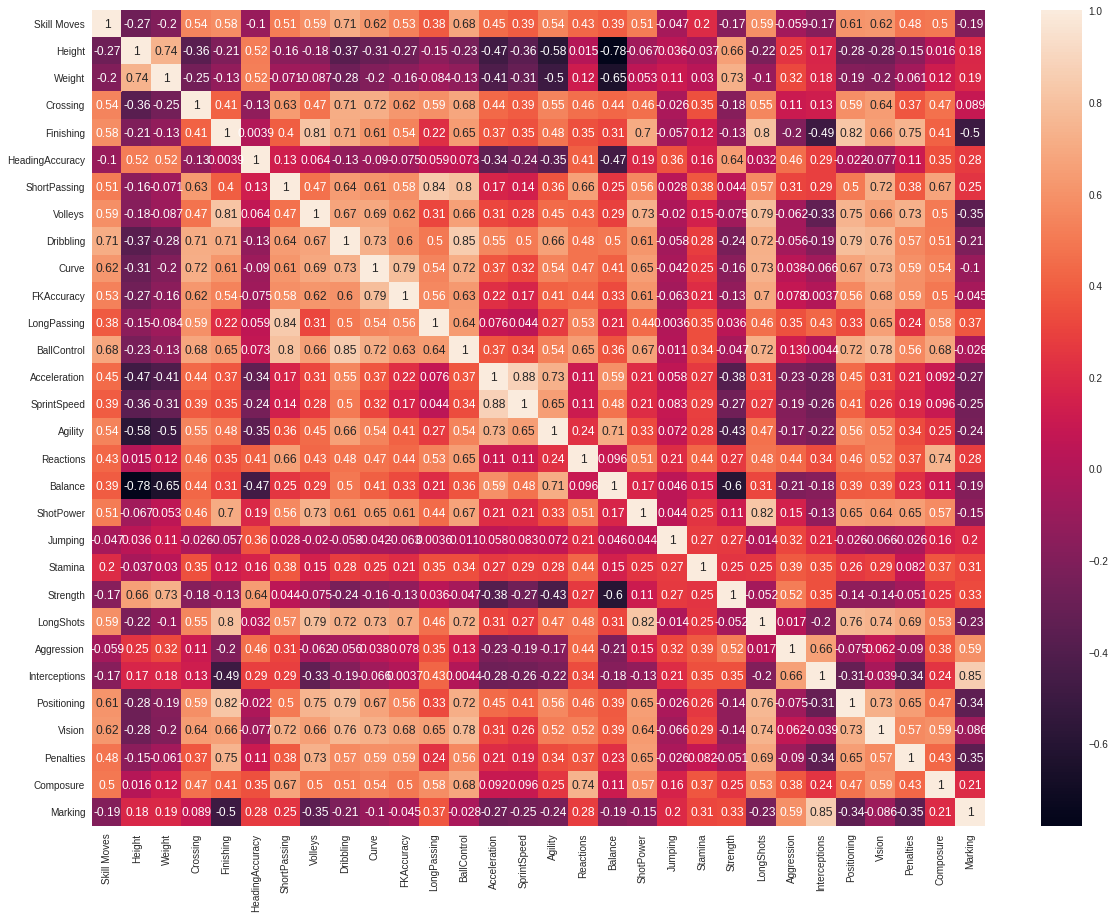

In [ ]:
plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True)

In [ ]:
# sns.heatmap(data.corr())
# sns.heatmap(corr, annot=True)


In [ ]:
# import pandas_profiling as pp

In [ ]:
# profile = ProfileReport(data, minimal=True)
# profile.to_file("output.html")

In [ ]:
# profile = pp.ProfileReport(data)
# profile.to_file("output.html")

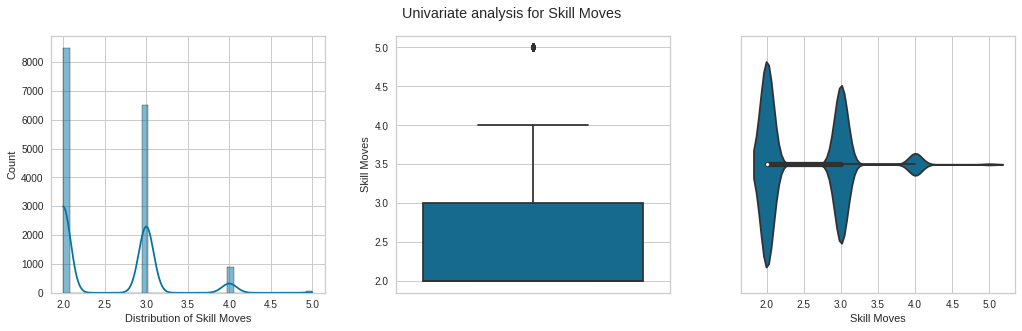

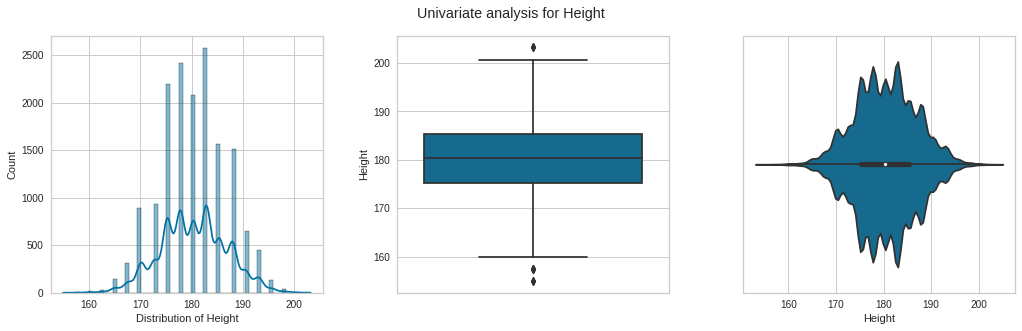

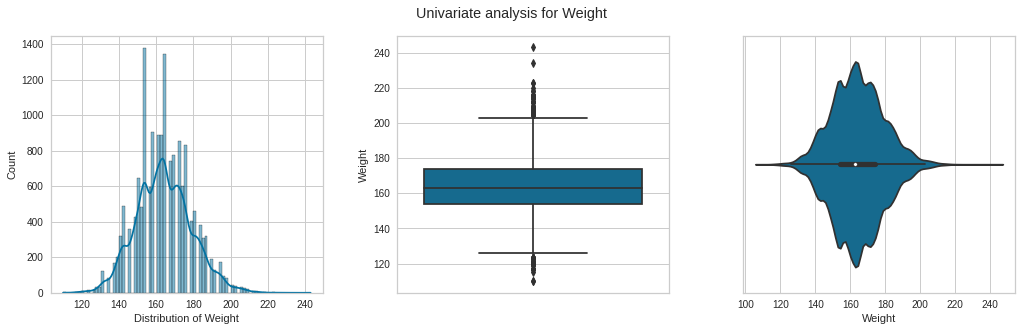

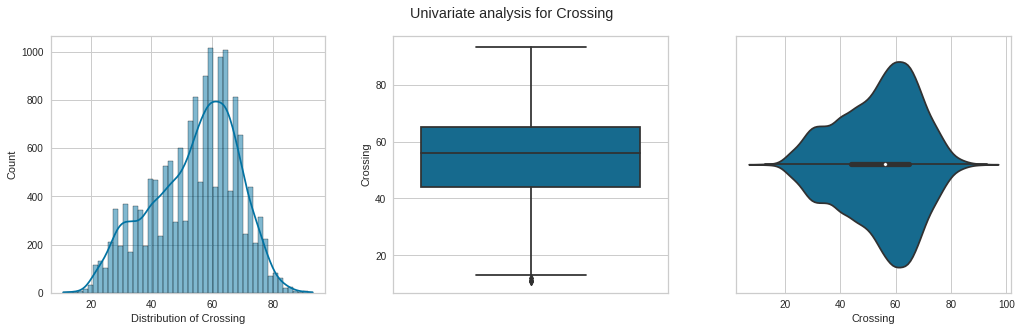

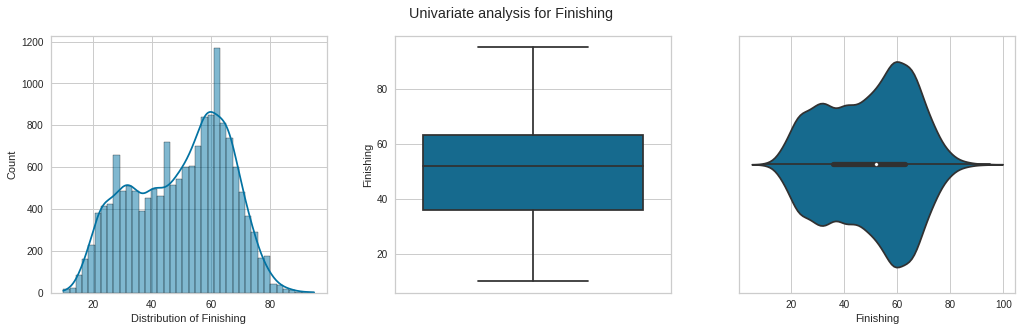

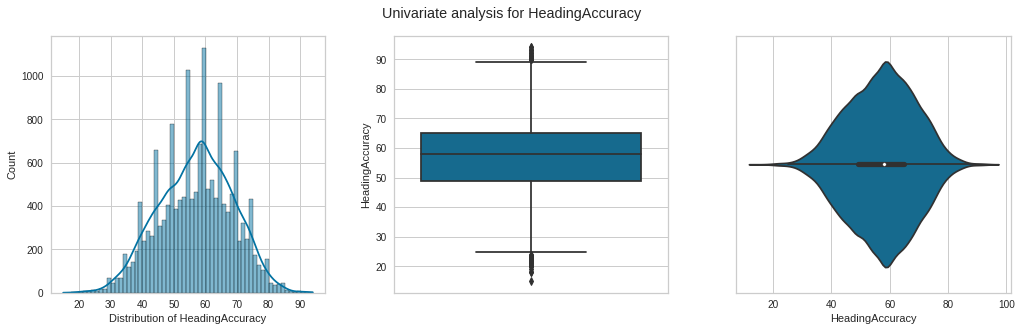

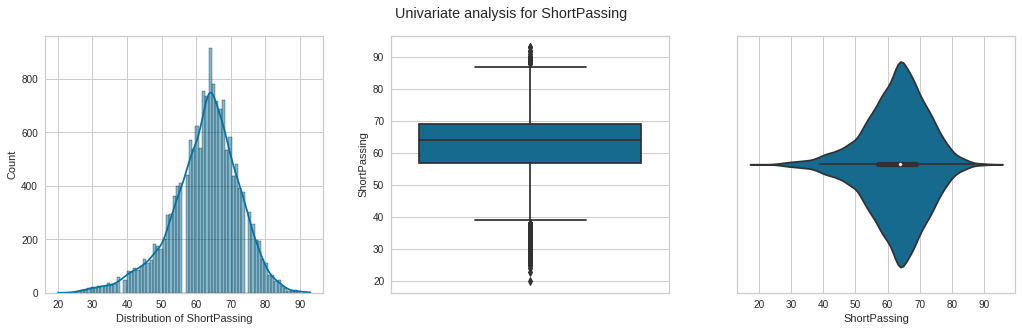

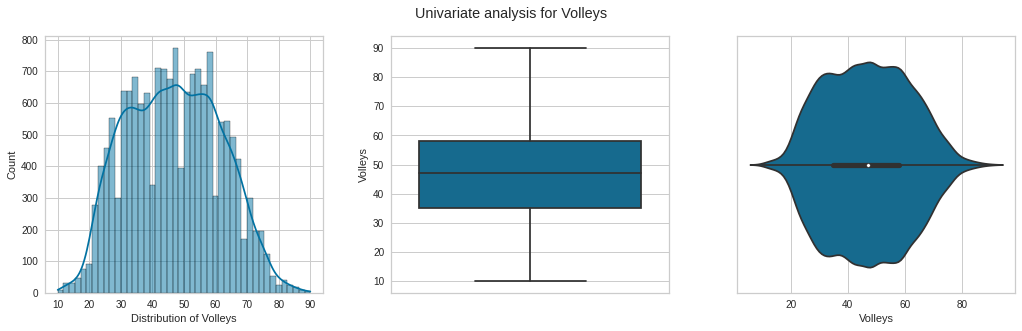

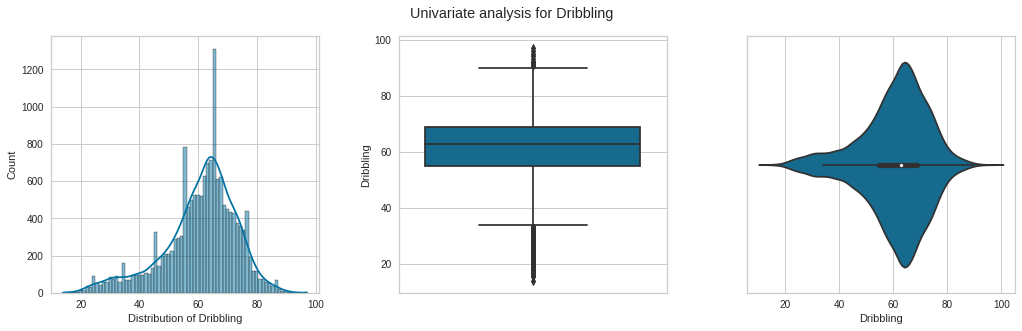

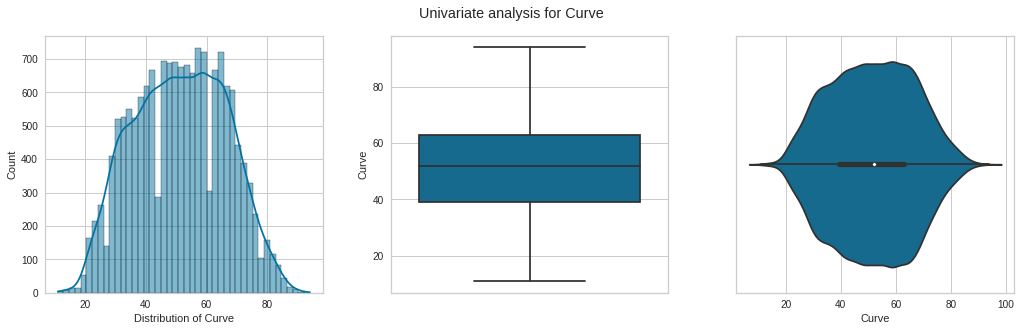

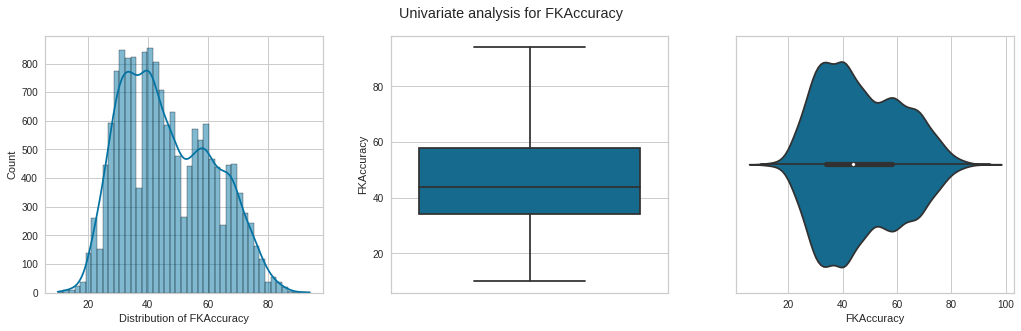

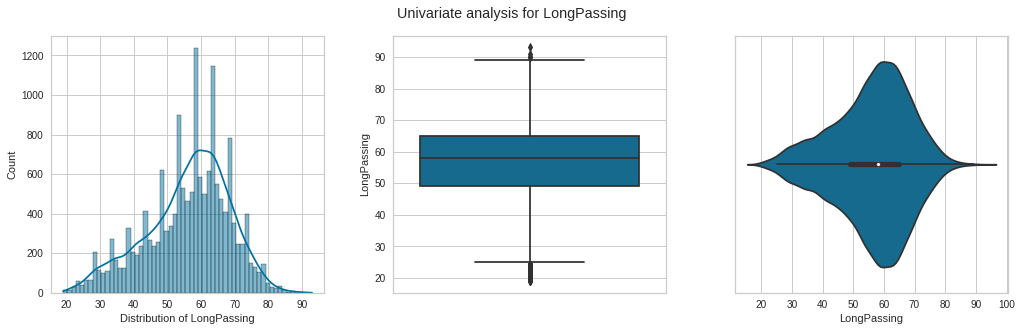

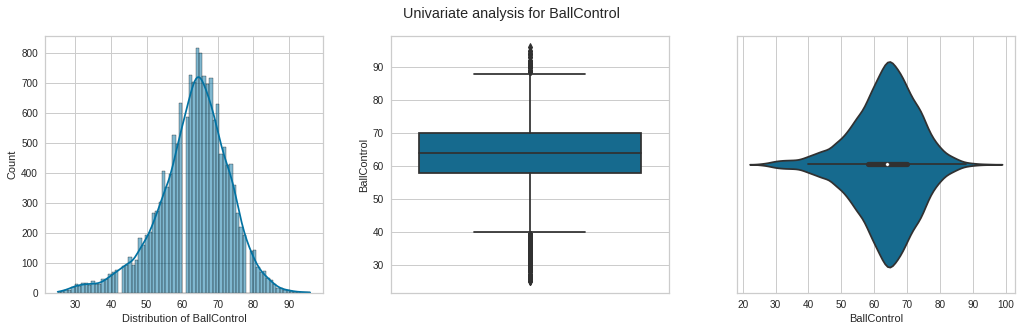

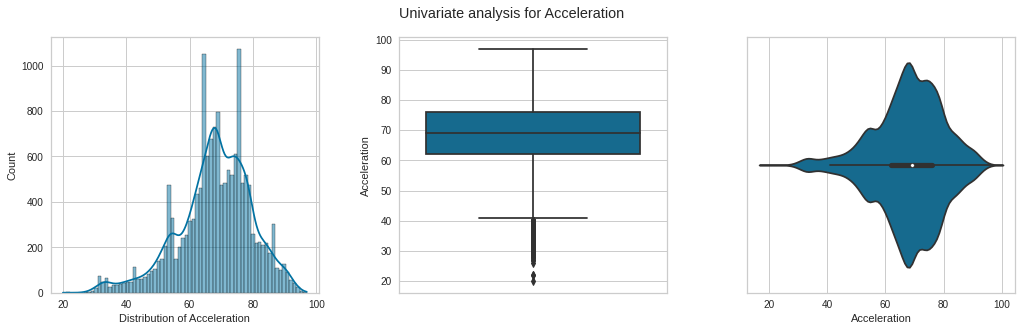

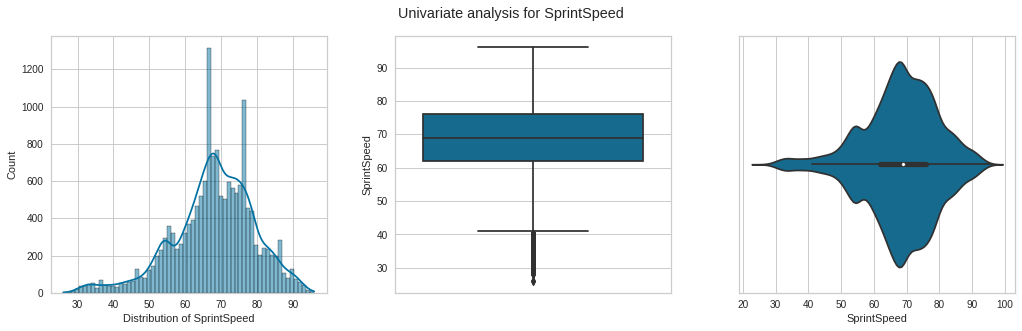

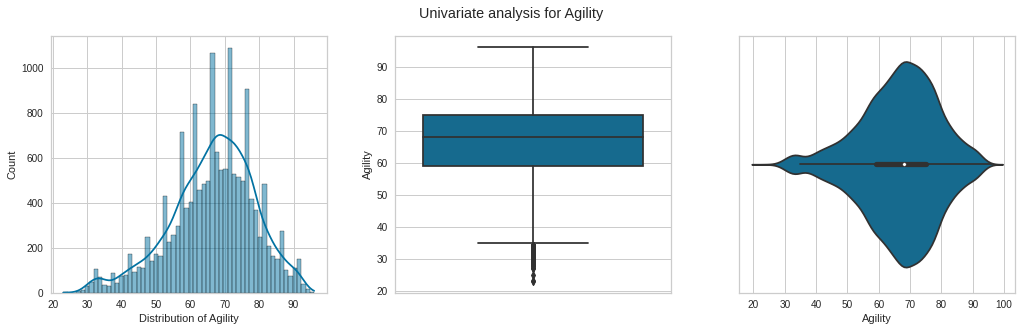

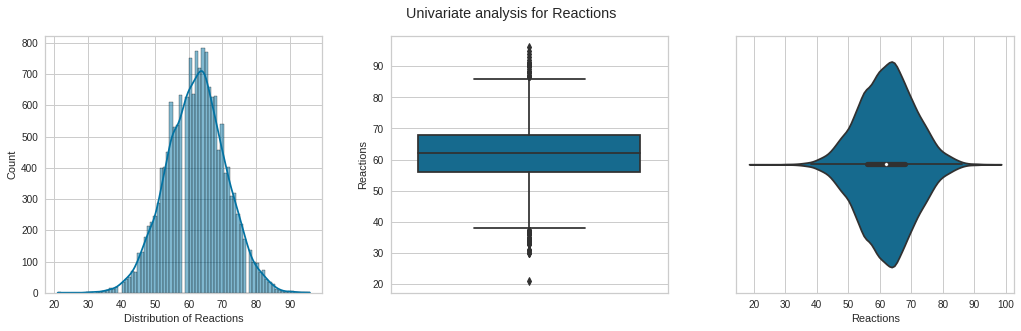

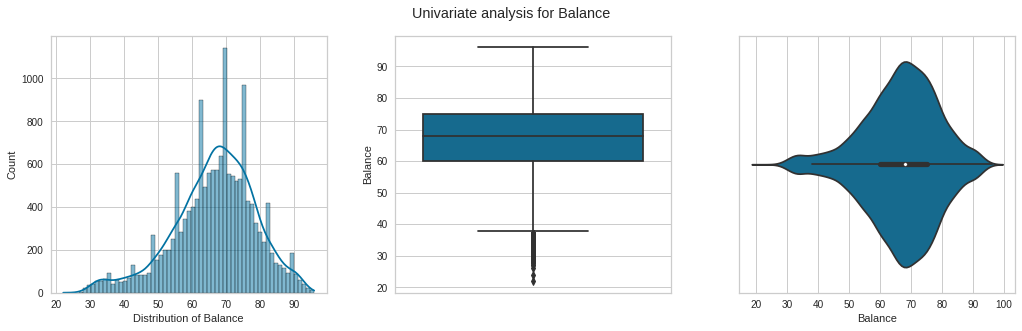

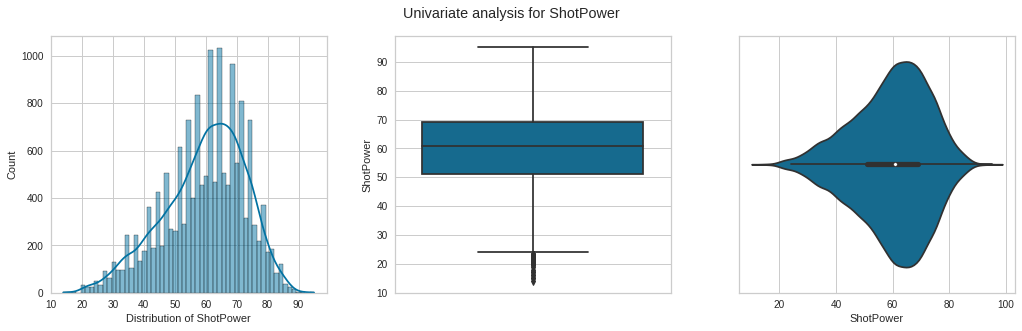

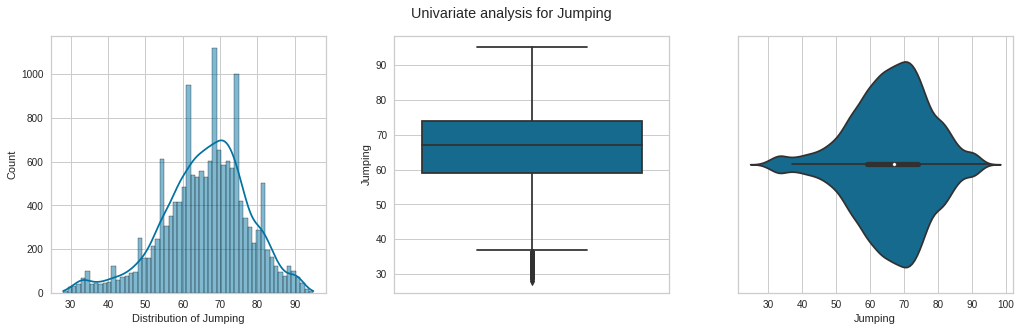

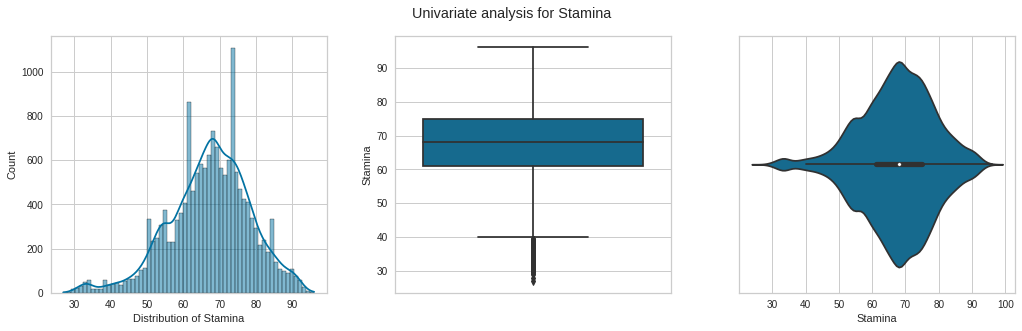

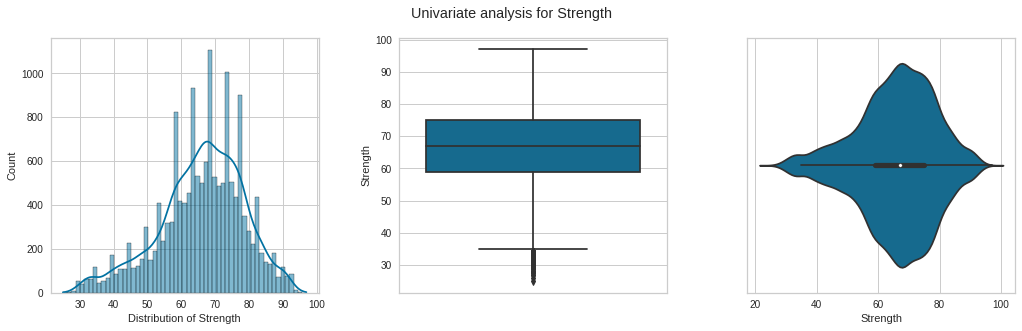

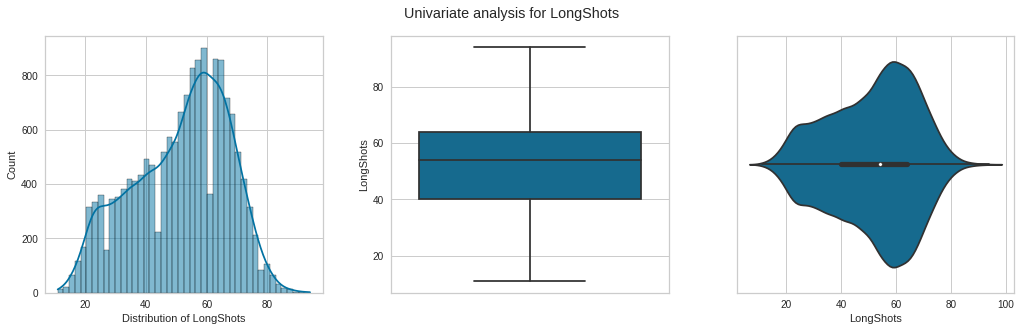

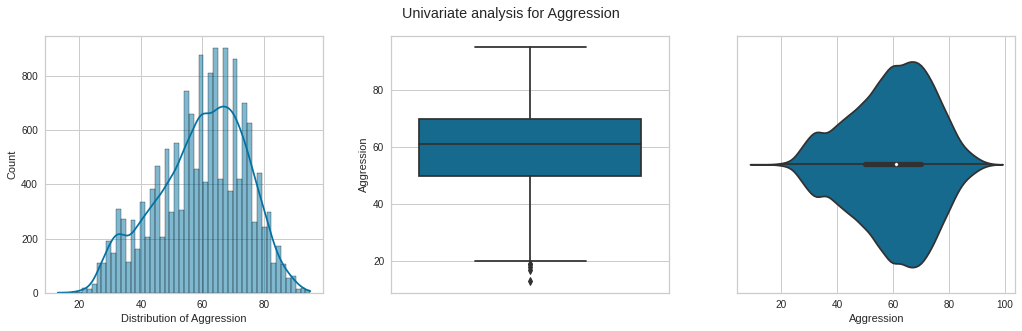

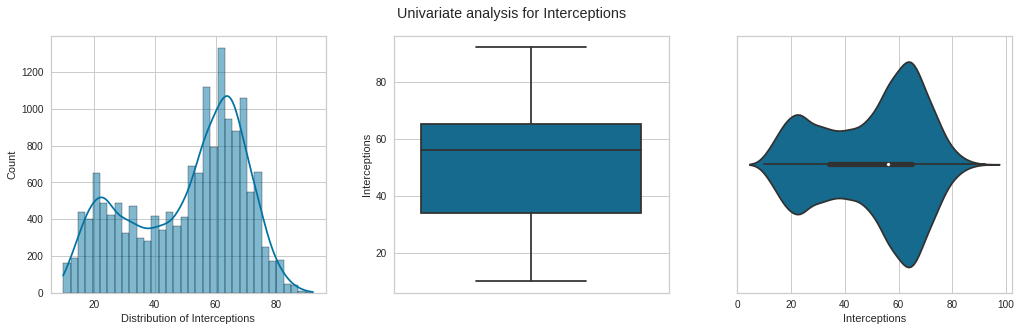

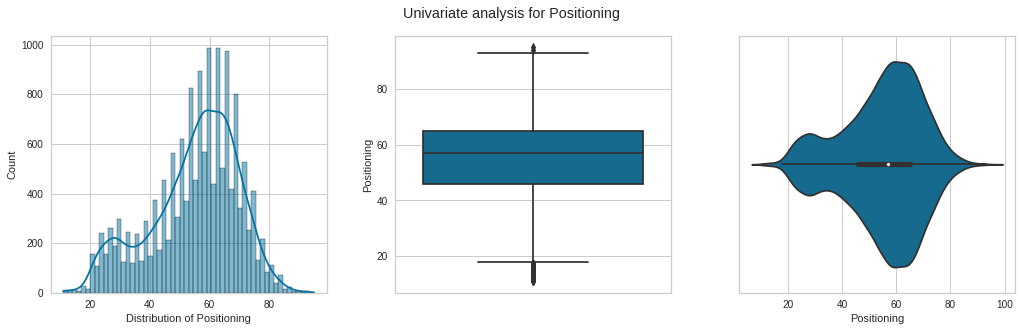

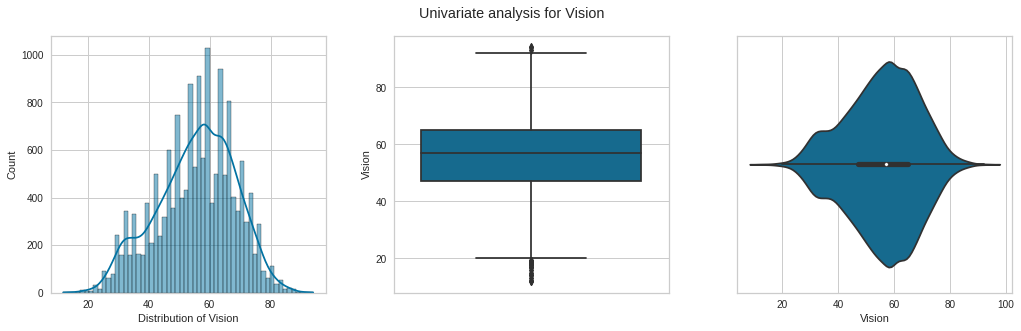

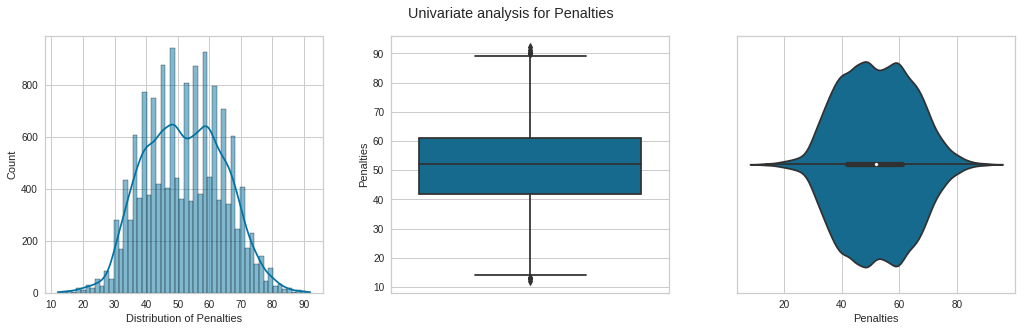

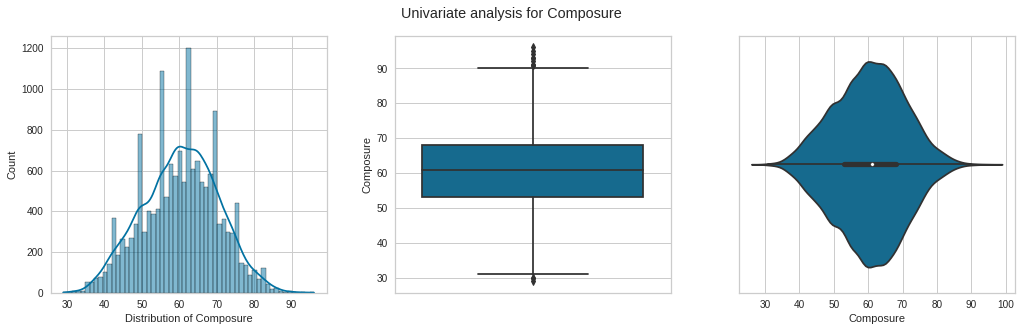

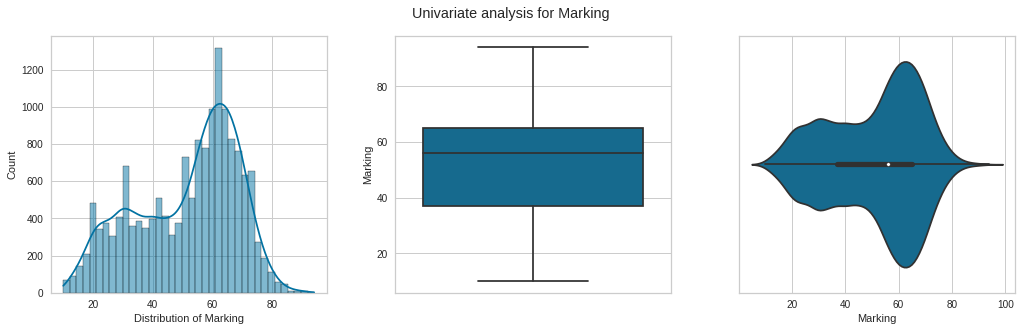

In [ ]:
univariate_analysis(features = data.columns, data = data)

### Clustering K-means

Antes de aplicar o K-Means aos dados vamos aplicar o MinMaxScaler e armazenar em um novo DataFrame **X**.

###<font color = yellow> 
O MinMaxScaler é uma outra alternativa a reescala de dados, seu diferencial se dá uma vez que este age sobre sobre a coluna, ou seja, o cálculo da reescala é feito de forma independente entre cada coluna, de tal forma que a nova escala se dará entre 0 e 1 (ou -1 e 1 se houver valores negativos no dataset).</p> **Importante ressaltar que essa técnica funciona melhor se a distribuição dos dados não for normal e se o desvio padrão for pequeno**</p>
#<font color = yellow> 
,além disso o MinMaxScaler não reduz de forma eficaz o impacto de outliers e também preserva a distribuição original. De forma simples o MinMaxScaler subtrai o valor em questão pelo menor valor da coluna e então divide pela diferença entre o valor máximo e mínimo:
</p>



https://caiquecoelho.medium.com/um-guia-completo-para-o-pr%C3%A9-processamento-de-dados-em-machine-learning-f860fbadabe1

 StandardScaler() também é outra forma de padronizar.
 Caso fosse fazer uma análise  ou projeto para negócio é uma boa prática testar todas as formas e ver qual melhor ajusta aos dados, como objetivo dessa análise e apenas mostrar algumas formas não foram testados outras formas de padronização.

In [ ]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
# estatísticas descritivas após a transformação
X.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Skill Moves,15966.0,0.18,0.21,0.0,0.00,0.00,0.33,1.0
Height,15966.0,0.53,0.13,0.0,0.42,0.53,0.63,1.0
Weight,15966.0,0.41,0.11,0.0,0.33,0.40,0.48,1.0
Crossing,15966.0,0.53,0.17,0.0,0.40,0.55,0.66,1.0
Finishing,15966.0,0.47,0.19,0.0,0.31,0.49,0.62,1.0
HeadingAccuracy,15966.0,0.53,0.15,0.0,0.43,0.54,0.63,1.0
ShortPassing,15966.0,0.58,0.13,0.0,0.51,0.60,0.67,1.0
Volleys,15966.0,0.46,0.18,0.0,0.31,0.46,0.60,1.0
Dribbling,15966.0,0.56,0.15,0.0,0.49,0.59,0.66,1.0
Curve,15966.0,0.49,0.18,0.0,0.34,0.49,0.63,1.0



precisa encontrar o número de cluesters para os dados, começando pelo metodo Elbow Method 



### Elbow  - Método do cotovelo
 Escolhendo o número de clusters para o K-Means

(https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9#:~:text=O%20M%C3%A9todo%20do%20Cotovelo&text=Como%20o%20KMeans%20calcula%20a,dist%C3%A2ncia%20seja%20a%20menor%20vi%C3%A1vel
)

WCSS é a soma da distância quadrada entre cada membro do cluster e seu centróide:
    
$$\text{WCSS} = \sum_{i=1}^{m}\left(x_i-c_i\right)^2$$


ara um claro exemplo de utilização do WCSS no KMeans e aplicação do método 


Elbow acesse [K-means Clustering Python Example](https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203)

De modo geral, o objetivo será detectar onde é o ponto de inflexão da variância (o ponto a partir do qual conseguimos notar certo grau de estabilidade).


In [ ]:
data.head()

,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,4.0,170.18,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0
1,5.0,187.96,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0
2,5.0,175.26,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0
4,4.0,180.34,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0
5,4.0,172.72,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0


In [ ]:
SEED = 99
wcss = list()
k_range = np.arange(1, 15)
n_jobs = -1,
# itera em um range de possíveis valores de K
# até a versão 0.23 do  sklearn  havia o argumento n_jobs. apos essa versão não e mais usado o argumento n_jobs
#
for k in k_range:
    # fit o KMeans com o respectivo número de K
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = SEED)
    kmeans = kmeans.fit(X)
    # append da inertia na lsita wcss
    wcss.append(kmeans.inertia_)

In [ ]:
wcss_df = pd.DataFrame({'wcss': wcss, 'k': k_range})
wcss_df

,wcss,k
0,13459.621697,1
1,9869.030034,2
2,8458.820867,3
3,7637.494712,4
4,7162.304712,5
5,6756.284172,6
6,6446.272040,7
7,6172.726523,8
8,5962.429885,9
9,5811.559753,10


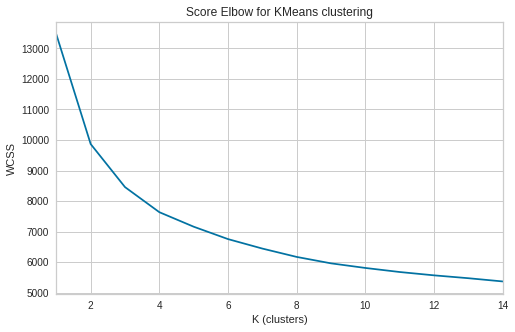

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(k_range, wcss)
ax.set(xlabel = 'K (clusters)', ylabel = 'WCSS', title = 'Score Elbow for KMeans clustering')
ax.set_xlim(k_range.min(), k_range.max());

Podemos fazer uma função para encapsular este código e escalar nossa aplicação. O k **é escolhido a partir do qual a curva se achata**, "onde o cotovelo está localizado".

Em nosso exemplo, $ K = 4$  é uma boa escolha.

In [ ]:
def elbow_method(X, n_clusters, seed):
    
    k_range = np.arange(1, n_clusters)
    wcss = list()
    SEED = seed
    
    for k in k_range:
        kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = SEED)
        kmeans = kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        
    wcss_df = pd.DataFrame({'wcss': wcss, 'k': k_range})
    return wcss_df

In [ ]:
wcss_df = elbow_method(X, n_clusters = 15, seed = 99)

Agora usemos o `yellowbrick` para validar novamente o número de clusters.

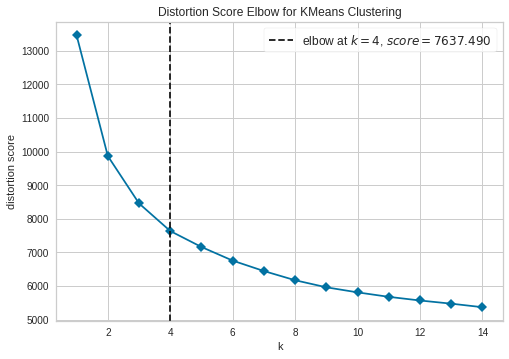

In [ ]:
kmeans_model = KMeans( random_state = 99)
visualizer = KElbowVisualizer(kmeans_model, k = (1, 15), timings = False)
visualizer.fit(X); visualizer.show();

Vamos usar outra métrica para validar o número de cluster, por meio do Silhouette score. 

In [ ]:
sillhoute_scores = []
n_cluster_list = np.arange(2, 15)

# itera nos possíveis valores de K e faz o cálculo da silhouette
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

In [ ]:
sillhoute_df = pd.DataFrame({'sillhoute_score': wcss, 'k': k_range})

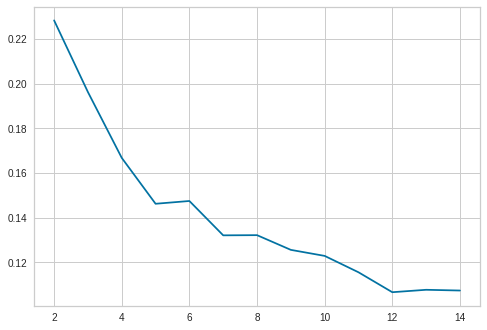

In [ ]:
plt.plot(n_cluster_list,sillhoute_scores)
plt.show()

##Pipe line decision tree

A classe Pipeline é uma funcionalidade do Scikit-Learn que ajuda criar códigos que possuam um padrão que possa ser facilmente entendido e compartilhando.

https://medium.com/data-hackers/como-usar-pipelines-no-scikit-learn-1398a4cc6ae9

In [ ]:
data_prep = Pipeline(
    [
        ('MinMax', MinMaxScaler())
    ]
)

kmeans = Pipeline(steps = [
    ('KMeans', KMeans(n_clusters = 4,random_state = 99, init = 'k-means++'))
])


pipe = Pipeline([
    ('preprocessor', data_prep),
    ('clustering', kmeans)
])

In [ ]:
pipe.fit(data)

Pipeline(steps=[('preprocessor', Pipeline(steps=[('MinMax', MinMaxScaler())])),
                ('clustering',
                 Pipeline(steps=[('KMeans',
                                  KMeans(n_clusters=4, random_state=99))]))])

In [ ]:
pd.Series(pipe['clustering']['KMeans'].labels_)

0        0
1        0
2        0
3        0
4        0
        ..
15961    2
15962    2
15963    1
15964    1
15965    2
Length: 15966, dtype: int32

In [ ]:
data['cluster'] = pipe['clustering']['KMeans'].labels_

In [ ]:
df['cluster'] = pipe['clustering']['KMeans'].labels_

### Clustering Analysis

:Verifica a proporção entre os clusters:

O cluster 1 há uma quanidade menor de dados.<p/>
Já os cluster 0,2,4 estão balanciado
 

In [ ]:
(data.cluster.value_counts(normalize = True)*100).round(2)

3    27.97
0    26.14
1    25.22
2    20.68
Name: cluster, dtype: float64

Seleciona Features para usar no modelo sendo X Features de entrada 
e y  a target 

In [ ]:
# features
X = data.drop(columns = 'cluster')
# target
y = data.cluster

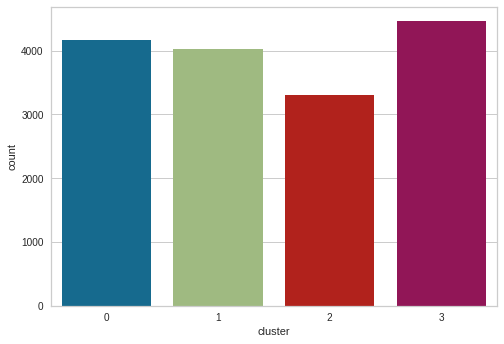

In [ ]:
sns.countplot(y);

para mellhor visualizaçao do cluster usei o metodo PCA para reduzir a dimesonalidade e ter uma boa noção de como os dadso estão agrupados 

In [ ]:
pca = PCA(2)
data_cluster = data.copy()
data_cluster = pca.fit_transform(data_cluster)

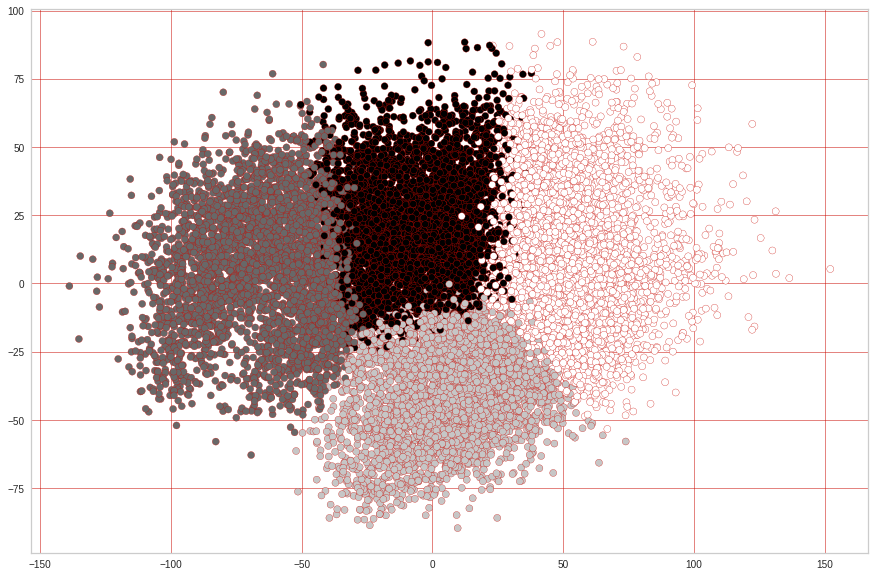

In [ ]:
# mudar pallet de cor 
#edgecolor='face'
from pylab import rcParams
import matplotlib as mpl
rcParams['figure.figsize'] = 15,10
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=data.cluster, edgecolors='r');
plt.rcParams["grid.linestyle"]="dashed"
plt.grid(color='r', linewidth=0.5)


Análise das classes 

In [ ]:
data.groupby(by = "cluster").describe()

Skill Moves                                               Height  \
              count      mean       std  min  25%  50%  75%  max   count   
cluster                                                                    
0            4174.0  3.193819  0.493961  2.0  3.0  3.0  3.0  5.0  4174.0   
1            4026.0  2.498510  0.531374  2.0  2.0  2.0  3.0  4.0  4026.0   
2            3301.0  2.006968  0.083193  2.0  2.0  2.0  2.0  3.0  3301.0   
3            4465.0  2.330795  0.472453  2.0  2.0  2.0  3.0  4.0  4465.0   

                                                                       Weight  \
               mean       std     min     25%     50%     75%     max   count   
cluster                                                                         
0        178.331246  5.811918  157.48  175.26  177.80  182.88  200.66  4174.0   
1        179.032146  6.610139  154.94  175.26  177.80  182.88  200.66  4026.0   
2        184.725944  5.897046  162.56  180.34  185.42  187.96  203.20  3301.0   
3        180.323503  5.585032  160.02  175.26  180.34  182.88  198.12  4465.0   

                                                                  Crossing  \
               mean        std    min    25%    50%    75%    max    count   
cluster                                                                      
0        161.757786  13.524393  115.0  152.0  161.0  170.0  216.0   4174.0   
1        160.019126  15.332177  110.0  150.0  159.0  170.0  243.0   4026.0   
2        171.879733  15.027644  121.0  163.0  172.0  183.0  234.0   3301.0   
3        164.290034  12.975986  110.0  154.0  163.0  172.0  220.0   4465.0   

                                                            Finishing  \
              mean        std   min   25%   50%   75%   max     count   
cluster                                                                 
0        66.633685   8.346569  29.0  62.0  67.0  72.0  93.0    4174.0   
1        49.144560  11.285938  11.0  41.0  51.0  58.0  77.0    4026.0   
2        39.686762  11.722862  11.0  30.0  39.0  49.0  72.0    3301.0   
3        57.843001   9.681845  22.0  52.0  59.0  65.0  86.0    4465.0   

                                                            HeadingAccuracy  \
              mean        std   min   25%   50%   75%   max           count   
cluster                                                                       
0        64.689267   8.856228  26.0  59.0  65.0  70.0  95.0          4174.0   
1        58.758073   8.950663  24.0  54.0  60.0  65.0  81.0          4026.0   
2        28.234777   7.985841  10.0  22.0  27.0  33.0  68.0          3301.0   
3        43.712206  10.058667  12.0  36.0  44.0  51.0  75.0          4465.0   

                                           ... Interceptions              \
              mean        std   min   25%  ...           min   25%   50%   
cluster                                    ...                             
0        57.747964  11.836279  18.0  50.0  ...          10.0  35.0  50.0   
1        51.910581  12.219929  15.0  42.0  ...          10.0  19.0  25.0   
2        60.467737  10.320292  22.0  53.0  ...          16.0  55.0  61.0   
3        58.476372  10.074852  22.0  52.0  ...          23.0  59.0  64.0   

                     Positioning                                          \
           75%   max       count       mean        std   min   25%   50%   
cluster                                                                    
0        66.00  92.0      4174.0  68.607810   7.213976  35.0  64.0  68.0   
1        34.75  64.0      4026.0  58.785147   8.064047  25.0  53.0  59.0   
2        66.00  88.0      3301.0  34.657074  10.343082  11.0  26.0  33.0   
3        69.00  90.0      4465.0  53.389698   9.252094  17.0  48.0  55.0   

                     Vision                                               \
          75%   max   count       mean       std   min   25%   50%   75%   
cluster                                                                    


Caracteristica para cada posição

| Defesa | Meio Campo Defesa | Meio campo Ataque | Ataque |
   |---|---|---|---|
   | Marking       | Marking       | Vision	   | Agility  |
   | Interceptions | Interceptions | How       | BallControl |
   | Jumping       | Jumping       | Composure | Finishing |
   | Composure     | Strength      | Agility   | SprintSpeed|
   | Strength      |               |           | Stamina|
  


Dentre as características de cada jogador há semelhança entre algum cluster.
Como o melhor K escolhido foi 4 o entendimento de negócio, alguns jogadores tem característica defesa, meio-campo (defesa) exemplo volante, meio-campo voltado a ataque, e atacante.</p>
Umas das aplicações desse cluster é identificar jogadores da base e entender qual habilidades ele tem e colocar em posição que ele tenha maior desempenho.

In [ ]:
data.groupby(by = "cluster").median().T

cluster,0,1,2,3
Skill Moves,3.0,2.0,2.00,2.00
Height,177.8,177.8,185.42,180.34
Weight,161.0,159.0,172.00,163.00
Crossing,67.0,51.0,39.00,59.00
Finishing,65.0,60.0,27.00,44.00
HeadingAccuracy,58.0,51.0,62.00,58.00
ShortPassing,71.0,59.0,55.00,65.00
Volleys,62.0,51.0,29.00,42.00
Dribbling,72.0,63.0,45.00,61.00
Curve,68.0,49.0,32.00,52.00


#### Conclusão
Para aplicação de negócio tendo um determinado jogador e sabendo qual suas habilidades fica mais 
fácil identificar onde o jogar poderá render mais, ou seja, consegue tirar melhor proveitos das habilidades do jogador.

______________________________________________________

### Feature importance

O feature_importance_ irá retornar um array onde cada elemento dele é uma feature do seu modelo. Ele irá dizer, em proporções, quão importante aquela feature é para o modelo, onde quanto maior o valor, mais importante a feature é para o modelo

Aqui aplicamos o feature importance.

In [ ]:
# instancia o algoritmo 
random_forest = RandomForestClassifier()
random_forest.fit(X, y)

RandomForestClassifier()

In [ ]:
# armazena os resultados em um DataFrame
importances_df = pd.DataFrame({'Features': X.columns, 
                               'Importance': random_forest.feature_importances_})
# ordena os valores
importances_df.sort_values(by = 'Importance', ascending = False, inplace = True)
# cria uma coluna com os resultados cumulativos
importances_df['Cumulative importance'] = importances_df.Importance.cumsum()
# calcula a importância relativa de cada feature
importances_df['Relative importance'] = ((importances_df.Importance/1)*100).round(2)

In [ ]:
importances_df

,Features,Importance,Cumulative importance,Relative importance
24,Interceptions,0.113875,0.113875,11.39
4,Finishing,0.083453,0.197327,8.35
22,LongShots,0.073289,0.270617,7.33
29,Marking,0.064886,0.335503,6.49
25,Positioning,0.061266,0.396769,6.13
26,Vision,0.055616,0.452386,5.56
9,Curve,0.052544,0.504929,5.25
12,BallControl,0.050412,0.555342,5.04
7,Volleys,0.049498,0.604839,4.95
8,Dribbling,0.045950,0.650789,4.60


Pré seleção

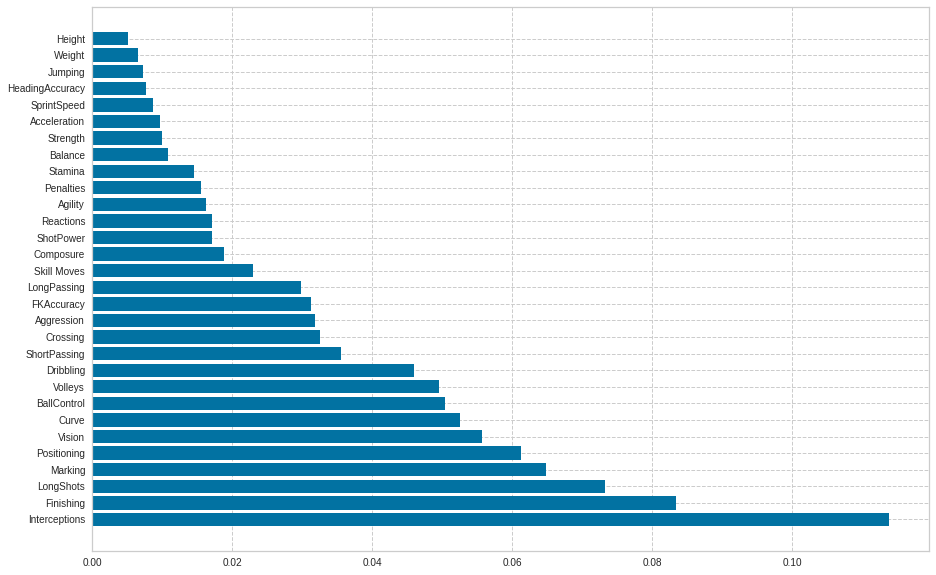

In [ ]:
plt.barh(importances_df.Features, importances_df.Importance);

### Classification: Árvore de Decisão






In [ ]:
# Função para criar pipeline com base no modelo
def create_pipe(model):
    clf = Pipeline(
        steps = [
            ('model', model)
        ]
    )
    return clf

In [ ]:
# Definindo pipeline com o modelo
pipe_dt = create_pipe(DecisionTreeClassifier(max_depth=5))

In [ ]:
SEED = 99
cv_skf = StratifiedKFold(shuffle=True, random_state = SEED)

In [ ]:
# Fazendo validação cruzada
cv_scores_dt = cross_validate(
    estimator=pipe_dt,
    X = X,
    y= y,
    scoring='accuracy',
    cv=cv_skf,
    return_train_score=True
)

In [ ]:
# acurácia média nos dados de treino
cv_scores_dt['train_score'].mean()

0.8477859410174859

In [ ]:
# acurácia média nos dados de teste
cv_scores_dt['test_score'].mean()

0.8305773960375514

In [ ]:
# text_representation = tree.export_text(tree_clf)
# print(text_representation)

https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py</p>
olhar depois com tempo para ver como plotar 


https://mljar.com/blog/visualize-decision-tree/

Métricas de treino e teste bem próximas, o que indica que não há overfitting.

Vamos fazer o hypertunning da nossa árvore. Sabemos que:

* critério: A função para medir a qualidade de uma divisão. Os critérios suportados são "gini" para a impureza de Gini e "entropia" para o ganho de informação.
* max_depth: A profundidade máxima da árvore.
* min_samples_leaf: O número mínimo de amostras necessárias para estar em um nó folha.
* min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno.

In [ ]:
param_grid_dt = {
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth' : range(1, 11),
    'model__min_samples_leaf' : range(2, 21, 2),
    'model__min_samples_split' : range(2, 41, 5),
}

random_search_dt = RandomizedSearchCV(
    estimator=pipe_dt,
    param_distributions=param_grid_dt,
    scoring='accuracy',
    random_state=123,
    n_jobs=-1,
    verbose=1,
    n_iter=1000
)

random_search_dt.fit(X, y);

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [ ]:
print(f'Melhor Score do Decision Tree: {random_search_dt.best_score_:.4f}')

Melhor Score do Decision Tree: 0.8243


In [ ]:
best_dt = random_search_dt.best_estimator_

In [ ]:
best_params = random_search_dt.best_params_

In [ ]:
best_params

{'model__criterion': 'entropy',
 'model__max_depth': 9,
 'model__min_samples_leaf': 16,
 'model__min_samples_split': 32}

In [ ]:
random_search_dt.best_score_

0.8243166750372263

Agora vamos treinar e avaliar o modelo com os hiperparâmetros escolhidos pelo RandomizedSearch.

In [ ]:
SEED = 99
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

In [ ]:
# treina o modelo de árvore com os melhores hiperparâmetros obtidos
clf_tree = DecisionTreeClassifier(
    criterion = best_params['model__criterion'],
    max_depth = best_params['model__max_depth'],
    min_samples_split = best_params['model__min_samples_split'],
    min_samples_leaf = best_params['model__min_samples_leaf']
)

In [ ]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=16,
                       min_samples_split=32)

In [ ]:
# calcula o y pred
y_pred = clf_tree.predict(X_test)

In [ ]:
# acurácia
accuracy_score(y_test, y_pred)

0.8653444676409185

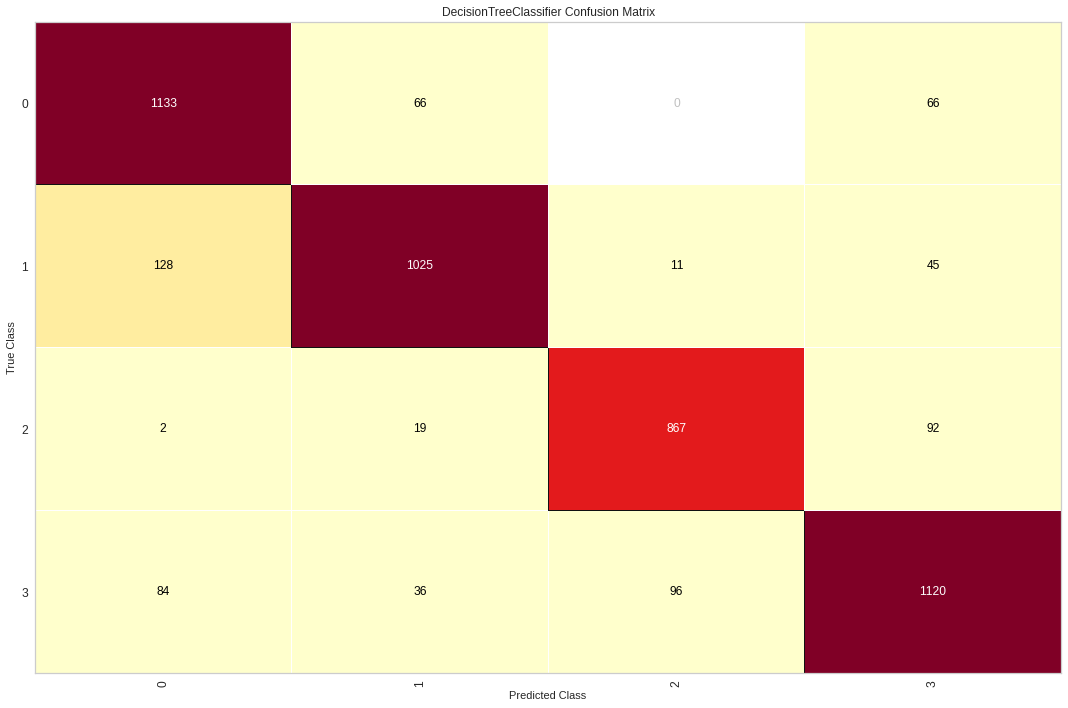

In [ ]:
# mostra a matriz de confusão com o yellowbrick
confusion_matrix = ConfusionMatrix(clf_tree)
confusion_matrix.fit(X_train, y_train);confusion_matrix.score(X_test, y_test);confusion_matrix.show();

In [ ]:
# mostra as métricas gerais
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1265
           1       0.89      0.85      0.87      1209
           2       0.89      0.88      0.89       980
           3       0.85      0.84      0.84      1336

    accuracy                           0.87      4790
   macro avg       0.87      0.87      0.87      4790
weighted avg       0.87      0.87      0.87      4790



Implemetar random forest e comparar com o algoritimo anterio ! 

### Classification: Random Florest( Floresta Aleatória)


In [ ]:
df_randon = data.copy()

#### Codificando os atributos para numéricos.

Usando LabelEncoder(), pois até o momento a biblioteca não usa data set com dados categoricos

In [ ]:
# caso o modelo tenha variável Categorica seria necessario fazer uma transformção 
Features = df_randon
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()   
    Features[col] = label.fit_transform(Features[col])  

In [ ]:
from sklearn.model_selection import train_test_split

utilizando um amostra para teste de 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_randon.drop('cluster',axis=1),df_randon['cluster'],test_size=0.3,random_state=0)

In [ ]:
X_train.shape,X_test.shape

((11176, 30), (4790, 30))

In [ ]:
random_clf = RandomForestClassifier()

In [ ]:
random_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
resultado = random_clf.predict(X_test)

In [ ]:
resultado

array([3, 1, 3, ..., 0, 3, 3], dtype=int32)

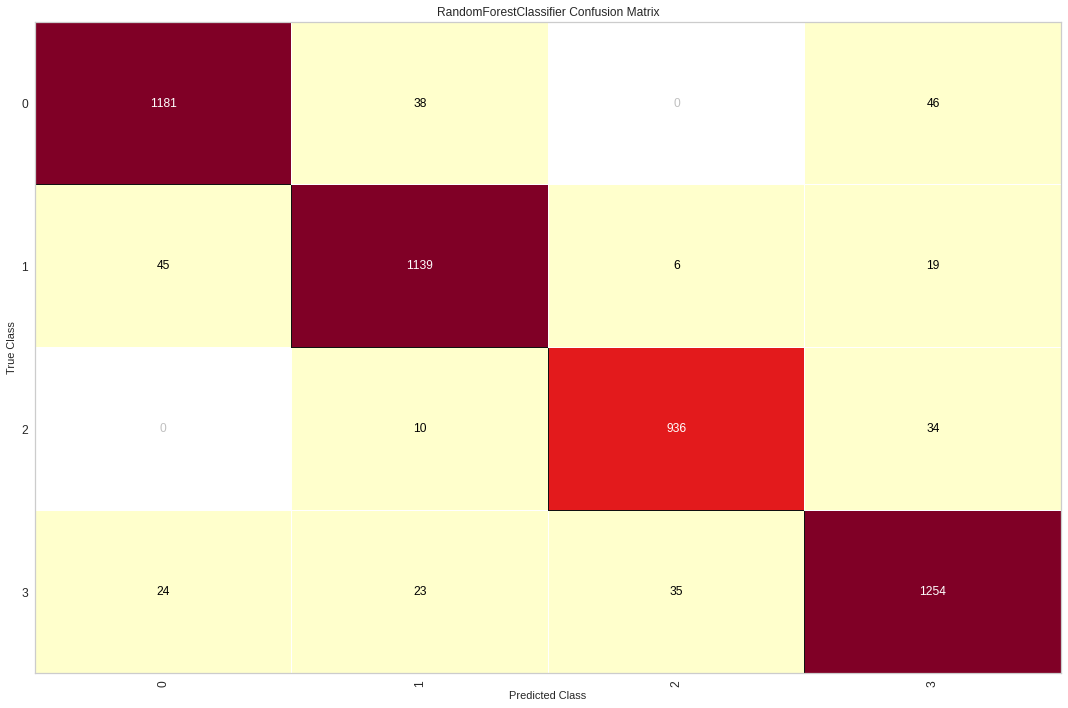

In [ ]:
# mostra a matriz de confusão com o yellowbrick
confusion_matrix = ConfusionMatrix(random_clf)
confusion_matrix.fit(X_train, y_train);confusion_matrix.score(X_test, y_test);confusion_matrix.show();

In [ ]:
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1265
           1       0.94      0.94      0.94      1209
           2       0.96      0.96      0.96       980
           3       0.93      0.94      0.93      1336

    accuracy                           0.94      4790
   macro avg       0.94      0.94      0.94      4790
weighted avg       0.94      0.94      0.94      4790



In [ ]:
random_clf.feature_importances_

array([0.01843779, 0.0644382 , 0.0151531 , 0.01138951, 0.03297095,
       0.03672419, 0.04054529, 0.0172751 , 0.01602061, 0.03155879,
       0.00460318, 0.00419012, 0.00861402, 0.00596705, 0.00416818,
       0.02173334, 0.0028906 , 0.00645459, 0.00320337, 0.0629786 ,
       0.01380356, 0.11778889, 0.04708875, 0.02539485, 0.0096284 ,
       0.0067892 , 0.05152136, 0.10233933, 0.08961517, 0.03738487,
       0.0197195 , 0.01914411, 0.02790129, 0.02256414])

In [ ]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [ ]:
feature_imp

Interceptions      0.098768
Marking            0.085255
Finishing          0.081497
LongShots          0.071701
Vision             0.058757
Curve              0.056101
Positioning        0.055729
Dribbling          0.051625
BallControl        0.050884
Volleys            0.048455
ShortPassing       0.038122
FKAccuracy         0.028753
Aggression         0.027287
Crossing           0.027281
LongPassing        0.026013
Skill Moves        0.021230
ShotPower          0.019615
Penalties          0.019054
Composure          0.019009
Reactions          0.017036
Agility            0.016838
Stamina            0.013810
Balance            0.010665
Strength           0.010433
Acceleration       0.010109
SprintSpeed        0.009119
HeadingAccuracy    0.007669
Jumping            0.007236
Weight             0.006282
Height             0.005668
dtype: float64

In [ ]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

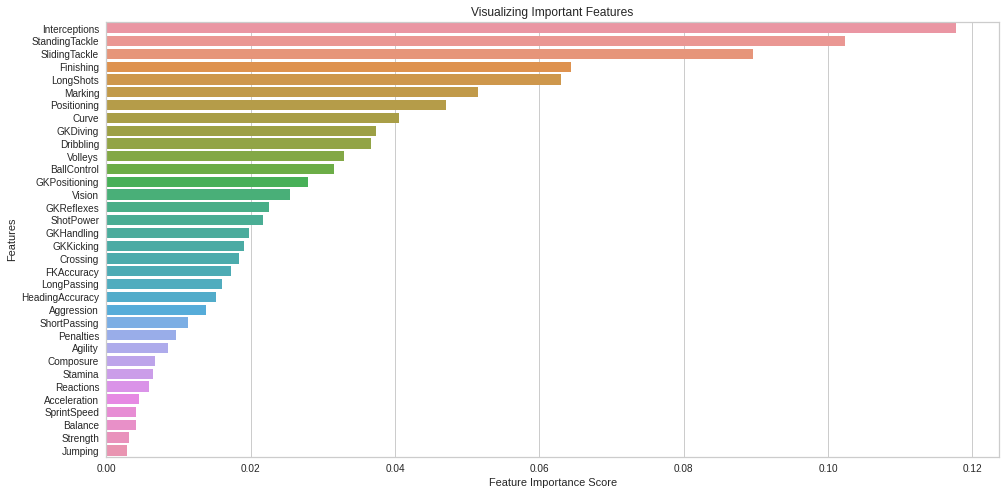

In [ ]:
visualiza_features_importantes(feature_imp)

In [ ]:
print("Número de árvores da floresta: {}".format(len(random_clf.estimators_)))
print("Árvores floresta gerada:")
for tree in random_clf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))

Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 1567
Profundidade da árvore: 28
Features importantes: [0.01994564 0.00475092 0.00639312 0.02446422 0.02647956 0.00555953
 0.00927996 0.10246905 0.0336275  0.15351331 0.03104479 0.0071806
 0.0174453  0.00746724 0.00402666 0.01425216 0.00614597 0.00713535
 0.01342214 0.00475583 0.01730208 0.00789864 0.03186987 0.01578285
 0.21413998 0.02970325 0.12674421 0.01219444 0.02428028 0.02072554]

Objeto: DecisionTreeClassifier(max_features='auto', random_state=1182378278)

Numero de nós: 1655
Profundidade da árvore: 26
Features importantes: [0.0149144  0.00701399 0.00682793 0.01144356 0.19495388 0.00658292
 0.01603412 0.03605716 0.13592675 0.13189048 0.02475055 0.01289689
 0.00961506 0.00417025 0.0097841  0.0110528  0.02140175 0.00631587
 0.01603035 0.00493687 0.01725074 0.02593556 0.01678237 0.01899669
 0.13823492 0.01310154 0.03943452 0.0139225  0.01614012 0.01760138]

Objeto: DecisionTreeClassifier(max_features='auto'

In [ ]:
tree0 = random_clf.estimators_[0]

In [ ]:
from sklearn.tree import export_graphviz
import graphviz 

colocar max_depth = 4 </p>
subustituir a plotagem de cima

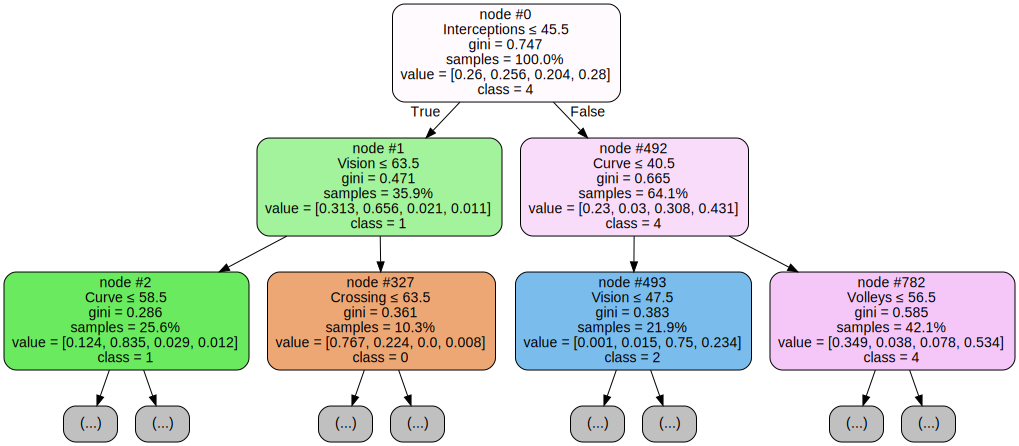

In [ ]:
dot_data = export_graphviz(
         tree0,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2','4'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

Randon Florest 


## Comparação Random florest com Decision Trees.

Comparando Random florest com Decision Trees noto-se um melhor desenpenho</p> 
com o Random Florest

In [ ]:
def compara_modelos_random_forest(maxdepth):
    if maxdepth == 0:
        rf = RandomForestClassifier(n_estimators=100,random_state=1)
    else: 
        rf = RandomForestClassifier(n_estimators=100,random_state=1, max_depth=maxdepth)
    rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    return train_score,test_score

In [ ]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1}         {} '.format(2,str(compara_modelos_random_forest(2))))
print('{:1}         {} '.format(3,str(compara_modelos_random_forest(3))))
print('{:1}         {} '.format(5,str(compara_modelos_random_forest(5))))
print('{:1}         {} '.format(10,str(compara_modelos_random_forest(10))))
print('{:1}         {} '.format(15,str(compara_modelos_random_forest(15))))
print('{:1}         {} '.format('Full',str(compara_modelos_random_forest(0))))

depth      Training score       Testing score       
-----      --------------       -------------       
2         (0.8787580529706513, 0.8816283924843423) 
3         (0.898353614889048, 0.8908141962421712) 
5         (0.9206335003579098, 0.9093945720250521) 
10         (0.988815318539728, 0.936116910229645) 
15         (0.9991947029348605, 0.9427974947807933) 
Full         (1.0, 0.9434237995824635) 


Arvore de decisão 

In [ ]:
def compara_modelos_decision_tree(maxdepth):
    if maxdepth == 0:
        df = DecisionTreeClassifier(random_state=1)
    else: 
        df = DecisionTreeClassifier(random_state=1, max_depth=maxdepth)
    df.fit(X_train, y_train)
    train_score = df.score(X_train, y_train)
    test_score = df.score(X_test, y_test)
    return train_score,test_score

In [ ]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1}         {} '.format(2,str(compara_modelos_decision_tree(2))))
print('{:1}         {} '.format(3,str(compara_modelos_decision_tree(3))))
print('{:1}         {} '.format(5,str(compara_modelos_decision_tree(5))))
print('{:1}         {} '.format(10,str(compara_modelos_decision_tree(10))))
print('{:1}         {} '.format(15,str(compara_modelos_decision_tree(15))))
print('{:1}         {} '.format('Full',str(compara_modelos_decision_tree(0))))

depth      Training score       Testing score       
-----      --------------       -------------       
2         (0.6937186828919112, 0.6918580375782881) 
3         (0.7931281317108089, 0.7937369519832985) 
5         (0.8506621331424481, 0.8359081419624217) 
10         (0.9578561202576951, 0.8613778705636743) 
15         (0.9906048675733715, 0.8665970772442588) 
Full         (1.0, 0.8574112734864301) 


In [ ]:
from sklearn.model_selection import GridSearchCV

___________________________________________________________________________


##Tunning do Modelo para Garantir o Melhor Desempenho

## Randon Florest

GridSearchCV para testes de Hyperparametros

In [ ]:
valores_estimators = [10, 20, 50, 100, 150]

In [ ]:
valores_criterion = ['gini','entropy']

In [ ]:
valores_max_depth = [10, 20, 50, 100]

In [ ]:
valores_min_samples_split = [2, 5, 10,15]
valores_min_samples_leaf = [1, 5, 10,15]

In [ ]:
parametros_grid = dict(n_estimators=valores_estimators,
                       criterion=valores_criterion,
                       max_depth=valores_max_depth,
                       min_samples_split=valores_min_samples_split,
                       min_samples_leaf=valores_min_samples_leaf 
                      )

In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(rf, parametros_grid, cv=5, scoring='accuracy')

https://towardsdatascience.com/data-science-quick-tip-003-using-scikit-learn-pipelines-66f652f26954

In [ ]:
grid.fit(data.drop('cluster',axis=1),data['cluster'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [10, 20, 50, 100, 150]},
             scoring='accuracy')

Rodar o grid_scores_ novamente, porém mudar o kernel

In [ ]:
#grid.grid_scores_

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [ ]:
grid.best_score_

0.9499303815093288

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators = 150 ,
                                      criterion='gini',
                                     max_depth = 20,
                                     min_samples_leaf = 1,
                                     min_samples_split = 5
                                     )

In [ ]:
rf = RandomForestClassifier(n_estimators = 150 ,
                                      criterion='gini',
                                     max_depth = 20,
                                     min_samples_leaf = 1,
                                     min_samples_split = 5)
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

In [ ]:
train_score 

0.9998210450966356

In [ ]:
test_score

0.9417536534446764

##Dentro os algoritmoso Randon Florest foi que teve melhor desempenho.
